In [37]:
import jsonpickle
import numpy as np
from copulas.multivariate import Multivariate
import matplotlib.pyplot as plt
from scipy.stats import expon
import pandas as pd

In [38]:
parameter_file_name = 'best_parameter_from_direct_experiment.json'

In [39]:
parameter_file_name = 'best_free_parameters_from_turbo.json'

In [40]:
free_parameters = jsonpickle.decode(open(parameter_file_name).read())

In [41]:
free_parameters = {'cov_para_1': -0.552913437627216, 'cov_para_2': -0.7373412946319331, 'cov_para_3': -0.6895207390630156, 'cov_para_4': 0.114587259600338, 'cov_para_5': -0.2654011763617513, 'cov_para_6': -0.5341893567987266, 'cov_para_7': -0.5649562432030253, 'cov_para_8': 0.745291612381331, 'cov_para_9': -0.16097847305880197, 'cov_para_10': -0.14538800618283287, 'cov_para_11': 0.4380322071679731, 'cov_para_12': 0.7240224128746574, 'cov_para_13': 0.31810392316776037, 'cov_para_14': 0.19969477660582224, 'cov_para_15': 0.053428038486730056, 'beta_1a': 1.4008484537117707, 'beta_1b': 17.550961281116567, 'beta_2a': 18.868630137962697, 'beta_2b': 10.8690083908138, 'beta_3a': 1.2412011478603804, 'beta_3b': 11.608282863149412, 'beta_4a': 14.9040701853299, 'beta_4b': 5.178418222712374, 'beta_5a': 12.475893795858212, 'beta_5b': 3.255937390737472, 'beta_6a': 2.0459950196325045, 'beta_6b': 7.351625752471271, 'lambda_expon_0': 0.04322399243188387, 'lambda_expon_1': 0.9965893274645383, 'lambda_expon_2': 0.06963066690617961, 'lambda_expon_3': 0.05389639374020216, 'lambda_expon_4': 0.08573396682192991}


In [42]:
free_parameters

{'cov_para_1': -0.552913437627216,
 'cov_para_2': -0.7373412946319331,
 'cov_para_3': -0.6895207390630156,
 'cov_para_4': 0.114587259600338,
 'cov_para_5': -0.2654011763617513,
 'cov_para_6': -0.5341893567987266,
 'cov_para_7': -0.5649562432030253,
 'cov_para_8': 0.745291612381331,
 'cov_para_9': -0.16097847305880197,
 'cov_para_10': -0.14538800618283287,
 'cov_para_11': 0.4380322071679731,
 'cov_para_12': 0.7240224128746574,
 'cov_para_13': 0.31810392316776037,
 'cov_para_14': 0.19969477660582224,
 'cov_para_15': 0.053428038486730056,
 'beta_1a': 1.4008484537117707,
 'beta_1b': 17.550961281116567,
 'beta_2a': 18.868630137962697,
 'beta_2b': 10.8690083908138,
 'beta_3a': 1.2412011478603804,
 'beta_3b': 11.608282863149412,
 'beta_4a': 14.9040701853299,
 'beta_4b': 5.178418222712374,
 'beta_5a': 12.475893795858212,
 'beta_5b': 3.255937390737472,
 'beta_6a': 2.0459950196325045,
 'beta_6b': 7.351625752471271,
 'lambda_expon_0': 0.04322399243188387,
 'lambda_expon_1': 0.9965893274645383,
 '

In [43]:
free_para1 = free_parameters['cov_para_1']
free_para2 = free_parameters['cov_para_2']
free_para3 = free_parameters['cov_para_3']
free_para4 = free_parameters['cov_para_4']
free_para5 = free_parameters['cov_para_5']
free_para6 = free_parameters['cov_para_6']
free_para7 = free_parameters['cov_para_7']
free_para8 = free_parameters['cov_para_8']
free_para9 = free_parameters['cov_para_9']
free_para10 = free_parameters['cov_para_10']
free_para11 = free_parameters['cov_para_11']
free_para12 = free_parameters['cov_para_12']
free_para13 = free_parameters['cov_para_13']
free_para14 = free_parameters['cov_para_14']
free_para15 = free_parameters['cov_para_15']

diag_1 = 1
diag_2 = np.sqrt(1-free_para1**2)
if (1-free_para2**2-free_para3**2)<0:
    diag_3 = np.sqrt(np.abs(1-free_para2**2-free_para3**2))
else:
    diag_3 = np.sqrt(1-free_para2**2-free_para3**2)

if (1-free_para4**2-free_para5**2-free_para6**2)<0:
    diag_4 = np.sqrt(np.abs(1-free_para4**2-free_para5**2-free_para6**2))
else:
    diag_4 = np.sqrt(1-free_para4**2-free_para5**2-free_para6**2)

if (1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)<0:
    diag_5 = np.sqrt(np.abs(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2))
else:
    diag_5 = np.sqrt(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)

if (1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2)<0:
    diag_6 = np.sqrt(np.abs(1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2))
else:
    diag_6 = np.sqrt(1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2)


lower_triangular_matrix = np.asarray([[diag_1,0,0,0,0,0],
                        [free_para1,diag_2,0,0,0,0],
                        [free_para2,free_para3,diag_3,0,0,0],
                        [free_para4,free_para5,free_para6,diag_4,0,0],
                        [free_para7,free_para8,free_para9,free_para10,diag_5,0],
                        [free_para11,free_para12,free_para13,free_para14,free_para15,diag_6]])


cov_matrix = lower_triangular_matrix@lower_triangular_matrix.transpose()


#now, define the marginal distribution of the gaussian copula
univerates = [{'loc': 0,
'scale': 1,
'a': free_parameters['beta_1a'],
'b': free_parameters['beta_1b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_2a'],
'b': free_parameters['beta_2b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_3a'],
'b': free_parameters['beta_3b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_4a'],
'b': free_parameters['beta_4b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_5a'],
'b': free_parameters['beta_5b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_6a'],
'b': free_parameters['beta_6b'],
'type': 'copulas.univariate.beta.BetaUnivariate'}]


#now, we construct the gaussian copula
copula_parameters = {}
copula_parameters['covariance'] = cov_matrix
copula_parameters['univariates'] = univerates
copula_parameters['type'] = 'copulas.multivariate.gaussian.GaussianMultivariate'
copula_parameters['columns'] = [0,1,2,3,4,5]

new_dist = Multivariate.from_dict(copula_parameters)

In [44]:
cov_matrix

array([[ 1.        , -0.55291344, -0.73734129,  0.11458726, -0.56495624,
         0.43803221],
       [-0.55291344,  1.        , -0.16684945, -0.28449937,  0.93337771,
         0.3610896 ],
       [-0.73734129, -0.16684945,  1.03822207,  0.02466194, -0.11958255,
        -0.77823217],
       [ 0.11458726, -0.28449937,  0.02466194,  1.        , -0.29204152,
        -0.15325339],
       [-0.56495624,  0.93337771, -0.11958255, -0.29204152,  1.        ,
         0.22684925],
       [ 0.43803221,  0.3610896 , -0.77823217, -0.15325339,  0.22684925,
         1.        ]])

In [45]:
#let's sample and plot the marginal distribution
samples = new_dist.sample(5000)

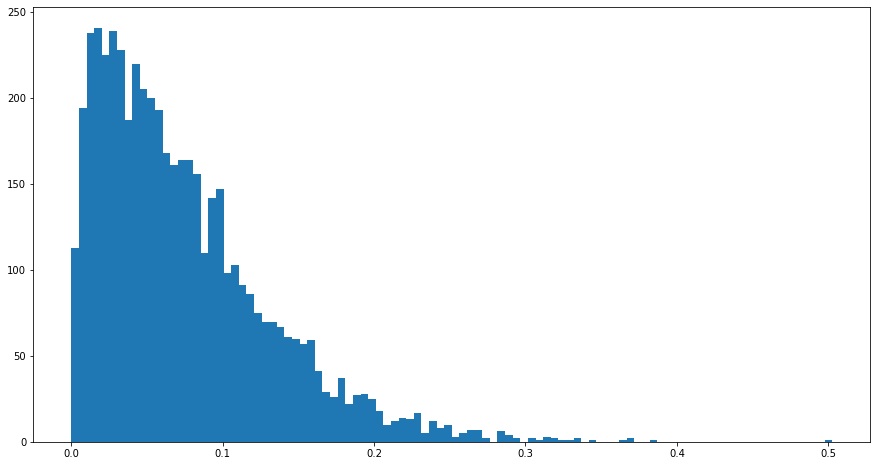

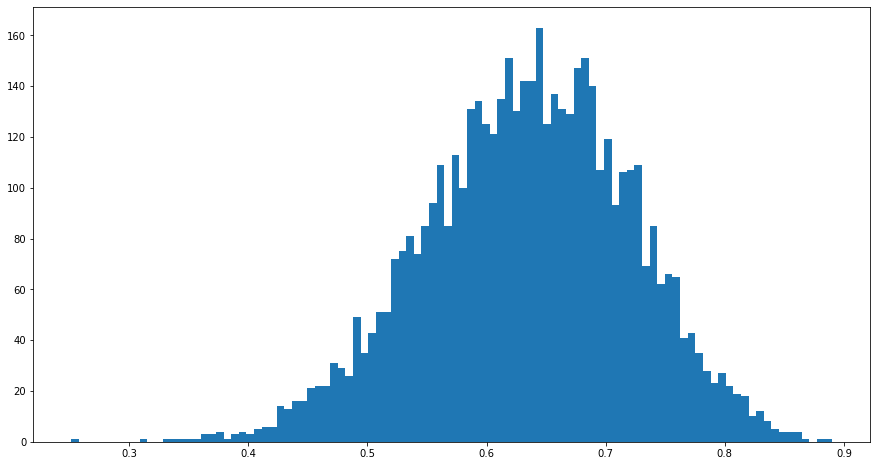

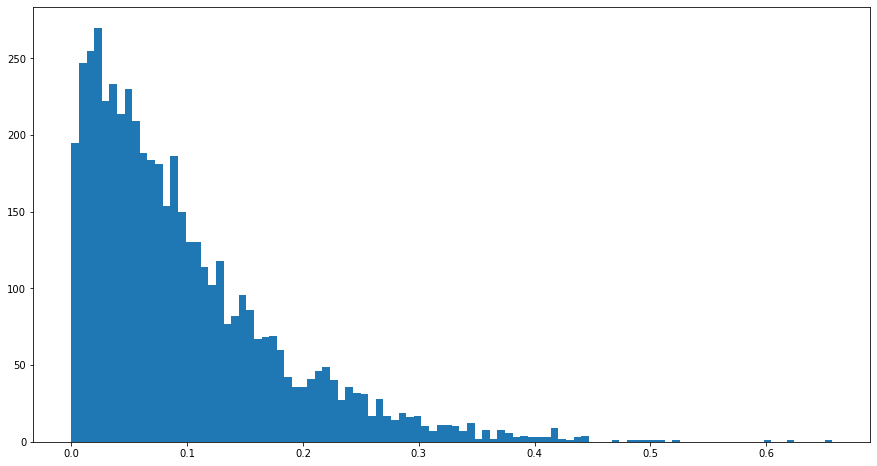

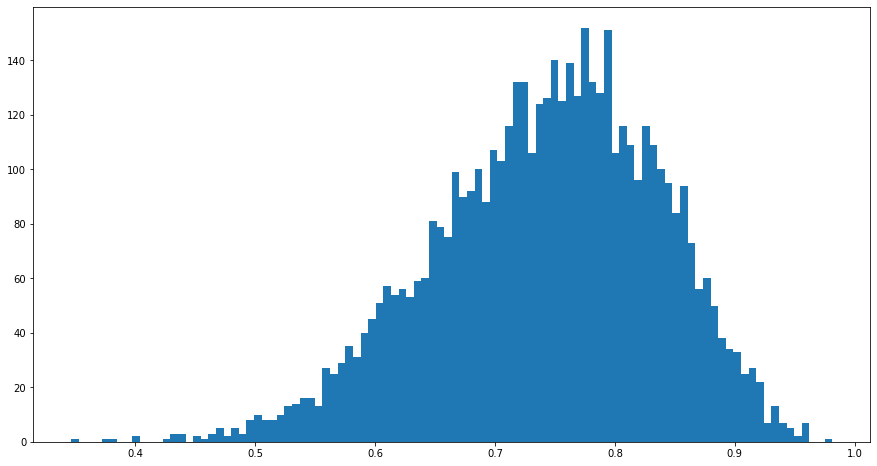

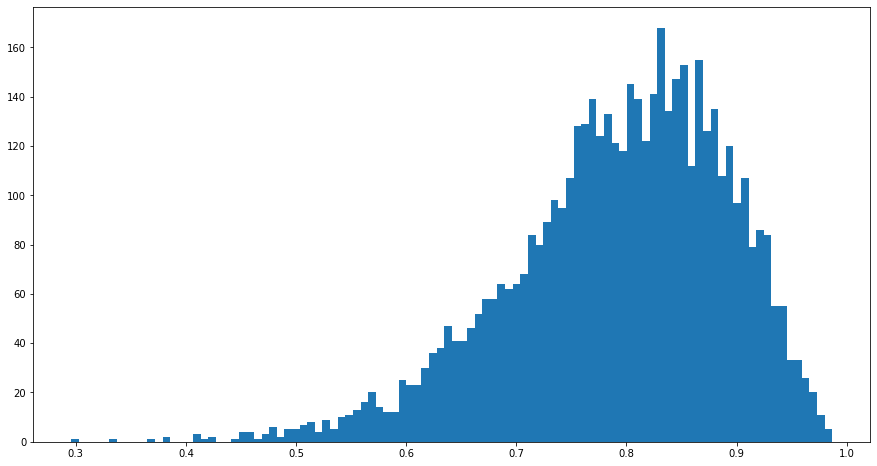

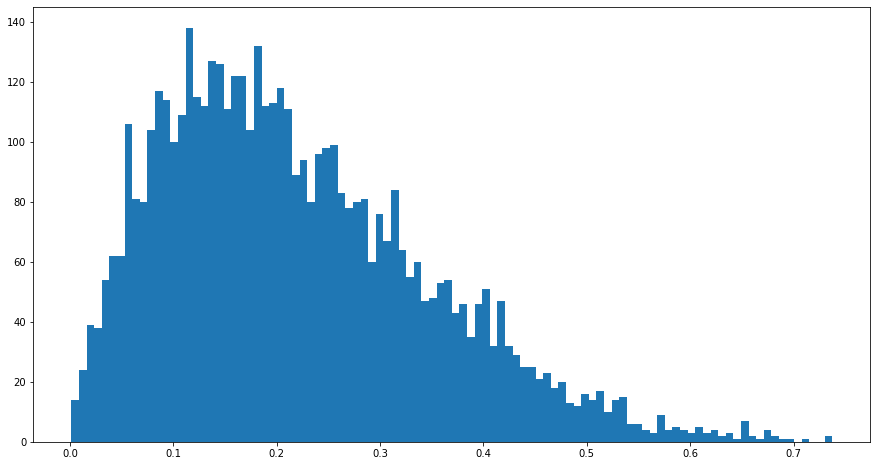

In [46]:
plt.rcParams["figure.figsize"] = (15,8)

for index in range(0,6):
    plt.hist(samples[index],bins = 100)
    plt.show()


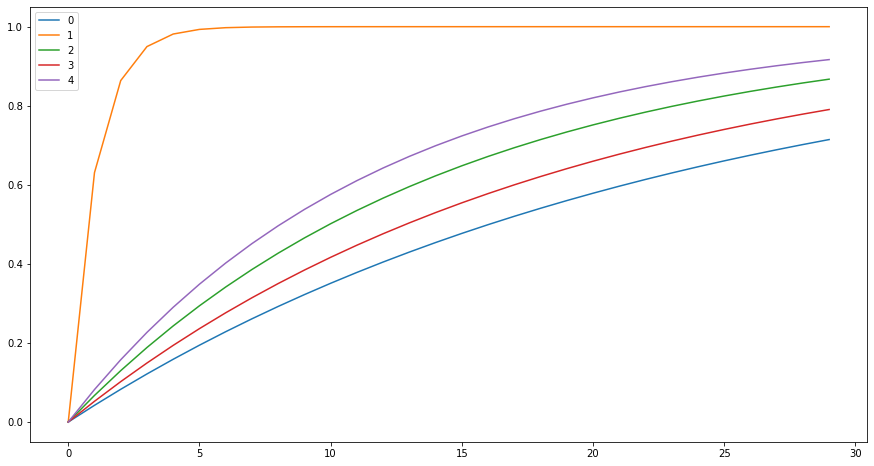

In [47]:
#other parameters needed for transforming the features
lambda_expon_0 = free_parameters['lambda_expon_0']
lambda_expon_1 = free_parameters['lambda_expon_1']
lambda_expon_2 = free_parameters['lambda_expon_2']
lambda_expon_3 = free_parameters['lambda_expon_3']
lambda_expon_4 = free_parameters['lambda_expon_4']
lambda_expons = [lambda_expon_0,lambda_expon_1,lambda_expon_2,lambda_expon_3,lambda_expon_4]

for line_index in range(0,len(lambda_expons)):

    x_plot = []
    y_plot = []
    
    for fake_days in range(0,30):
        r = expon.cdf(fake_days,scale = 1.0/lambda_expons[line_index])
        y_plot.append(r)
        x_plot.append(fake_days)

    plt.plot(x_plot,y_plot,label = str(line_index))

plt.legend()
plt.show()

In [48]:
import trading_vix_non_random_seed
env = trading_vix_non_random_seed.trading_vix_non_random_seed(seed_index = 700)

In [49]:
visualize_time_length = 200

price_history = []
vix_history = []
action_history1 = np.zeros((1,visualize_time_length+1))
action_history2 = np.zeros((1,visualize_time_length+1))
portfolio_value_history = []
transaction_value_history = []

price,current_feature,portfolio_value,current_vix = env.reset(return_price=True)

price_history.append(price)
portfolio_value_history.append(portfolio_value)
transaction_value_history.append(0)
vix_history.append(current_vix)

for time_index in range(0,visualize_time_length):
    
    #compute an action given current observation
    transformed_features = []
    for feature_index in range(len(lambda_expons)):
        transformation = expon.cdf(current_feature[feature_index,0],scale = 1.0/lambda_expons[feature_index])
        min_transformation = 0.1
        transformation = min_transformation*np.exp(np.log(1.0/min_transformation)*transformation)
        transformed_features.append(transformation)
    transformed_features = np.asarray(transformed_features)
    transformed_features = np.reshape(transformed_features,(1,-1))
    holding_position = current_feature[-1,:][0]
    if holding_position<0:
        print('holding is less than 0, there is some problem and the holding position is',holding_position)
    if holding_position>1:
        print('holding is greater than 1, there is some problem and the holding position is',holding_position)
    min_transformed_holding = 0.1
    transformed_holding = min_transformed_holding*np.exp(np.log(1.0/min_transformed_holding)*holding_position)
    transformed_holding = np.reshape(transformed_holding,(1,1))
    data_point_for_df = np.concatenate((transformed_features,transformed_holding),axis = 1)

    assert data_point_for_df.shape[1] == 6
    data_point_for_copula = pd.DataFrame(data_point_for_df)
    action = new_dist.cdf(data_point_for_copula)
    
    #apply the action to the environment
    price, current_feature,execute_action,need_to_buy,need_to_sell,portfolio_value,transaction_value,\
    current_vix = env.step(action,return_price=True)

#     if execute_action and need_to_buy:
#         print('buy')
#         print('time index is',time_index)
#     if execute_action and need_to_sell:
#         print('sell')
#         print('time index is',time_index)
    
    #record price and action
    price_history.append(price)
    if execute_action:
        if need_to_buy:
            action_history1[0,time_index] = 2 #add 1 because of initial price observation
            #print('record buy action')
        if need_to_sell:
            action_history1[0,time_index] = 1
            #print('record sell action')

    action_history2[0,time_index] = action 
    portfolio_value_history.append(portfolio_value)
    transaction_value_history.append(transaction_value)
    vix_history.append(current_vix)

In [50]:
print(action_history1.shape)
print(action_history2.shape)
print(len(price_history))
print(len(portfolio_value_history))
print(len(transaction_value_history))
print(len(vix_history))

(1, 201)
(1, 201)
201
201
201
201


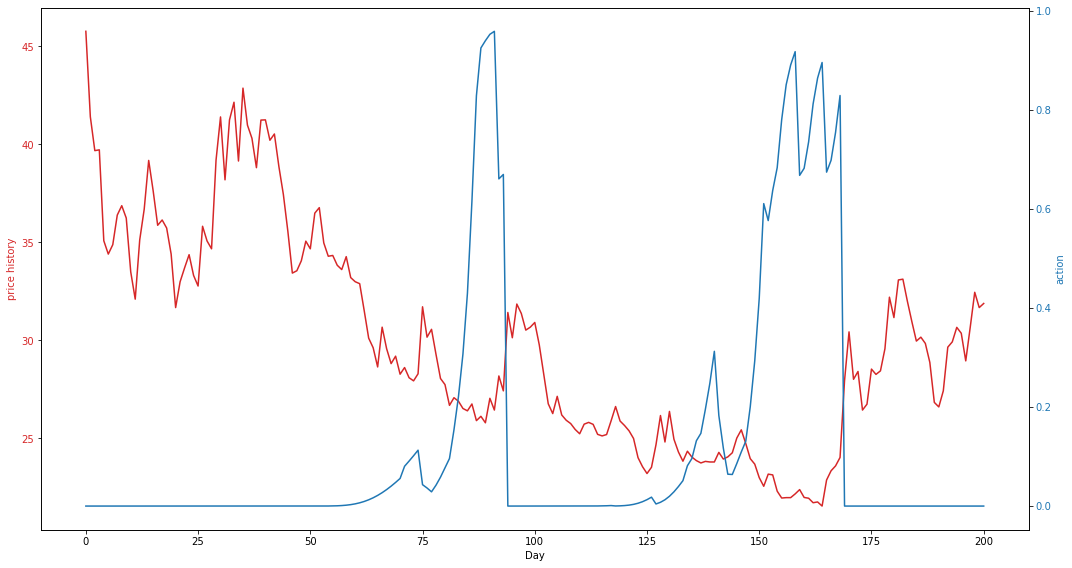

In [51]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

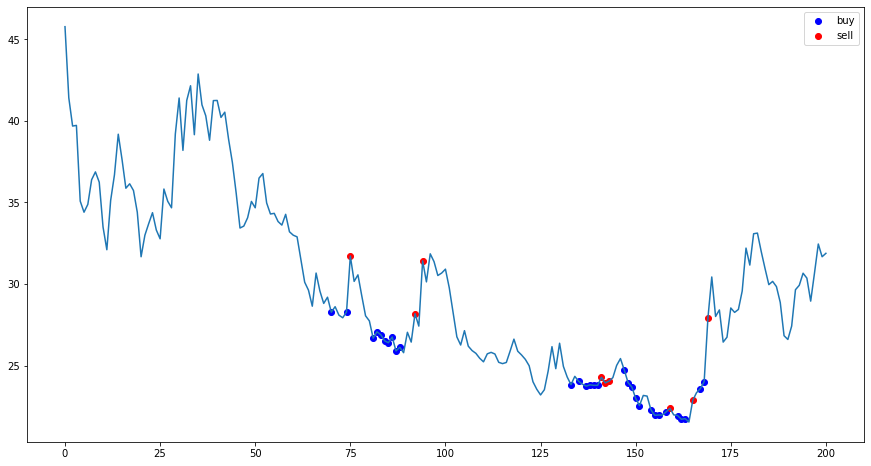

In [52]:


already_plotted_sell_legend = False
already_plotted_buy_legend = False

plt.plot(price_history)
for time_index in range(0,len(action_history1[0])):

    if action_history1[0,time_index]==2:
        #print('the buy price is',price_history[time_index])
        if already_plotted_sell_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'b',label = 'buy')
            already_plotted_sell_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'b')

    elif action_history1[0,time_index]==1:
        #print('the sell price is',price_history[time_index])
        #print(' ')
        if already_plotted_buy_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'r',label = 'sell')
            already_plotted_buy_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'r')
plt.legend()
plt.show()



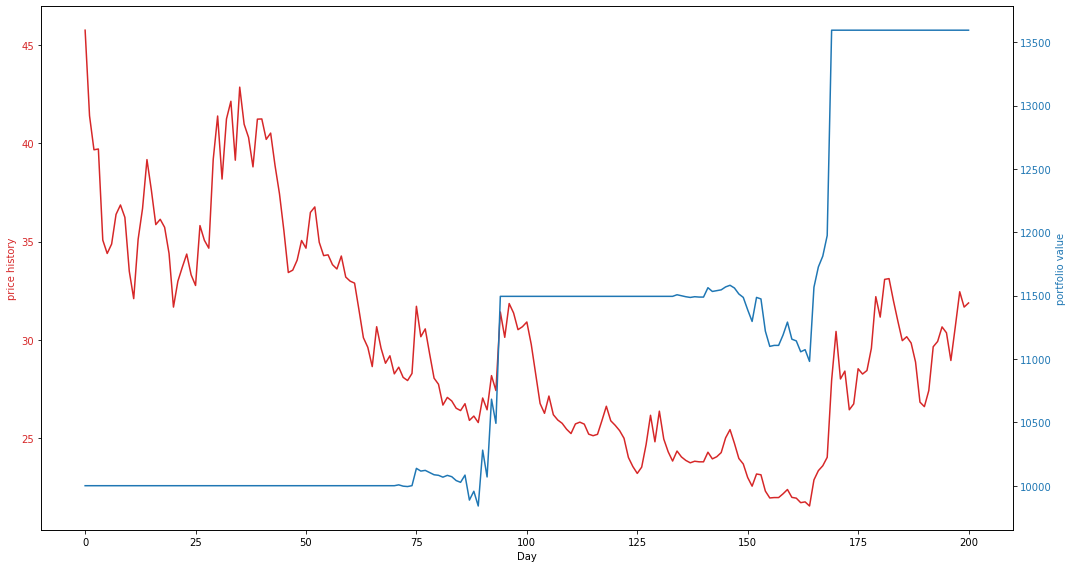

In [53]:


plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('portfolio value', color=color)  # we already handled the x-label with ax1
ax2.plot(portfolio_value_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



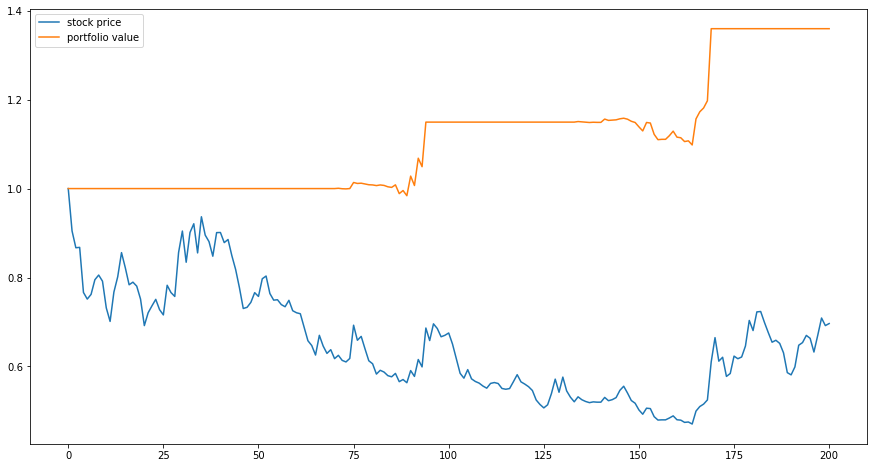

In [54]:
plt.plot(np.asarray(price_history)/price_history[0],label = 'stock price')
plt.plot(np.asarray(portfolio_value_history)/portfolio_value_history[0],label = 'portfolio value')
plt.legend()
plt.show()